# The Natural Cycle of Range Change

In [1]:
from pandas_datareader import data  
from datetime import datetime
import pandas_datareader as pdr
import pandas as pd
import mplfinance as mpf
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

## Nasdaq 100 Futures from mid 2020 to late'r--' 2020

In [2]:
start = datetime(2020,4,1)
end = datetime(2020,9,30)
# NASDAQ FUTURES
df = pdr.get_data_yahoo('NQ=F', start, end)

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-31,7995.00,7747.50,7856.75,7786.25,424386.0,7786.25
2020-04-01,7773.50,7404.25,7772.50,7438.75,411364.0,7438.75
2020-04-02,7656.25,7376.00,7473.50,7627.25,436829.0,7627.25
2020-04-03,7660.25,7423.50,7623.00,7522.75,351874.0,7522.75
2020-04-06,8099.00,7535.50,7535.75,8029.75,396874.0,8029.75
...,...,...,...,...,...,...
2020-09-24,11011.75,10660.25,10803.50,10891.75,791934.0,10891.75
2020-09-25,11166.25,10813.75,10914.25,11136.50,600725.0,11136.50
2020-09-28,11404.00,11140.25,11145.00,11394.75,568217.0,11394.75


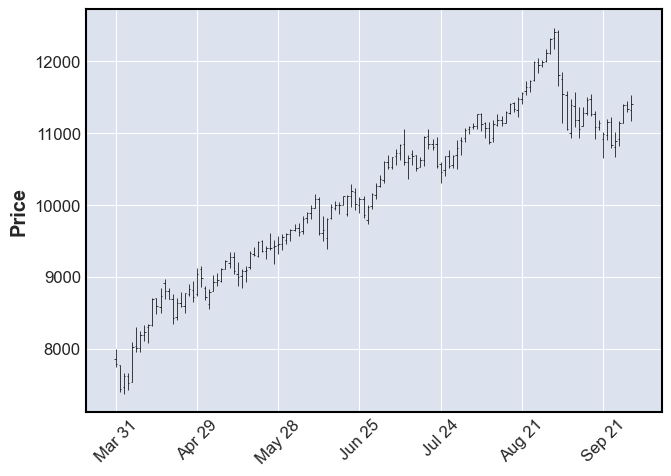

In [4]:
mpf.plot(df)

## Cycle of Large to Small Ranges

In [5]:
df['high_low_diff'] = df['High'] - df['Low']
vara = 5
varb = 12
maa = df['high_low_diff'].rolling(window=vara).mean()
mab = df['high_low_diff'].rolling(window=varb).mean().rolling(window=vara).mean()
df['high_low_diff'] = maa / mab * 100
df['line'] = 85

In [6]:
apds = [
    mpf.make_addplot((df['high_low_diff']),panel=1,color='g'),
    mpf.make_addplot((df['line']),panel=1,color='c')
]

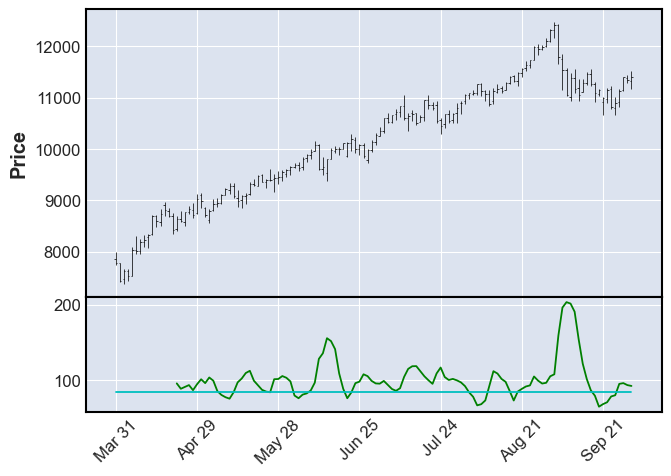

In [7]:
mpf.plot(df, addplot=apds)

## Distribution of Value of Open to Close versus (Open-Low) as Percentage of Yesterday's Range

### Treasury Yield 10 Years from early 2001 to early 2021

In [8]:
start = datetime(2001,1,1)
end = datetime(2021,2,1)
# S&P FUTURES
df = pdr.get_data_yahoo('^TNX', start, end)

In [9]:
df['oc_range'] = (df['Close'] - df['Open']) * 10_000
df['ol_lag_range'] = (df['Open'] - df['Low']) / (df['High'] - df['Low']).shift(1) * 100
df['x_0_line'] = 0

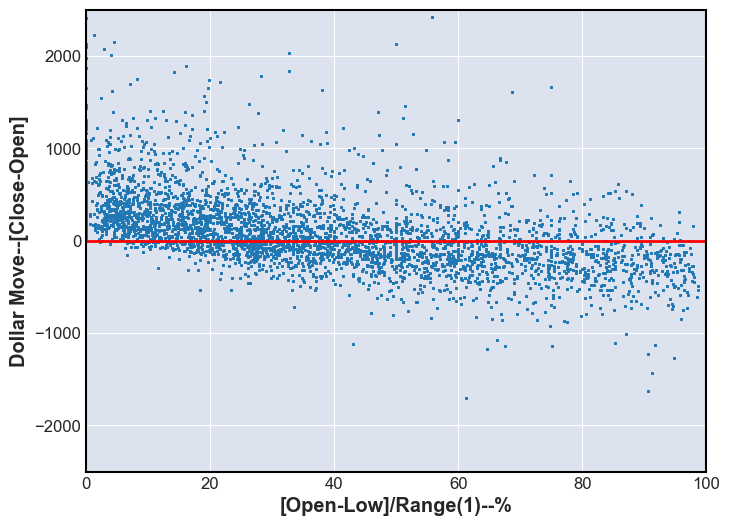

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(df['ol_lag_range'], df['oc_range'], marker="+", s=3)
ax.plot(df['x_0_line'].values, c='red')
plt.xlabel('[Open-Low]/Range(1)--%')
plt.ylabel('Dollar Move--[Close-Open]')
# limit x axis to 100% (like book)
plt.xlim(0, 100)
plt.ylim(-2500, 2500)
plt.show()

## Probability of Dollar Value of Open to Close versus (Open-Low) as Percentage of Yesterday's Range

In [11]:
# round to nearest 10
df['ol_lag_range_round'] = df['ol_lag_range'].round(-1)

In [12]:
# limit x axis to 100% (like book)
ol_lag_range_round_count = df[df['ol_lag_range_round'] < 100].groupby('ol_lag_range_round').count()['oc_range']
total_count = ol_lag_range_round_count.sum()

In [13]:
oc0 = df[(df['ol_lag_range_round'] < 100) & (df['oc_range'] > 0)].groupby('ol_lag_range_round').count()['oc_range'] / ol_lag_range_round_count * 100
oc500 = df[(df['ol_lag_range_round'] < 100) & (df['oc_range'] > 500)].groupby('ol_lag_range_round').count()['oc_range'] / ol_lag_range_round_count * 100
oc1000 = df[(df['ol_lag_range_round'] < 100) & (df['oc_range'] > 1000)].groupby('ol_lag_range_round').count()['oc_range'] / ol_lag_range_round_count * 100

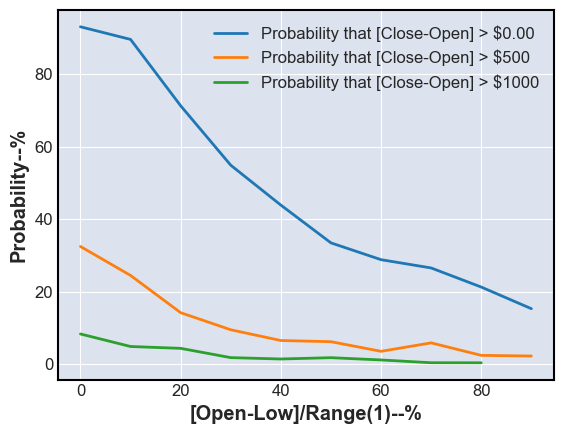

In [14]:
plt.plot(oc0, label="Probability that [Close-Open] > $0.00")
plt.plot(oc500, label="Probability that [Close-Open] > $500")
plt.plot(oc1000, label="Probability that [Close-Open] > $1000")
plt.xlabel('[Open-Low]/Range(1)--%')
plt.ylabel('Probability--%')
plt.legend()
plt.show()